# How well do jobs and skills pay for Data Analysts?

## Methodology

1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for Data Analysts
3. Visualize for highest paying skills and most demanded skills

In [1]:
# Importing libraries
import ast 
import pandas as pd
import seaborn as sns
from datasets import load_dataset 
import matplotlib.pyplot as plt 

# Loading Data 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

1. Evaluate median salary for top 6 data jobs

In [33]:
df_MY = df[df['job_country'] == 'Malaysia'].dropna(subset=['salary_year_avg']).copy()

In [ ]:
job_titles = df_MY['job_title_short'].value_counts().index[:6].tolist()

In [15]:
df_MY_top6 = df_MY[df_MY['job_title_short'].isin(job_titles)]

In [31]:
job_order = df_MY_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

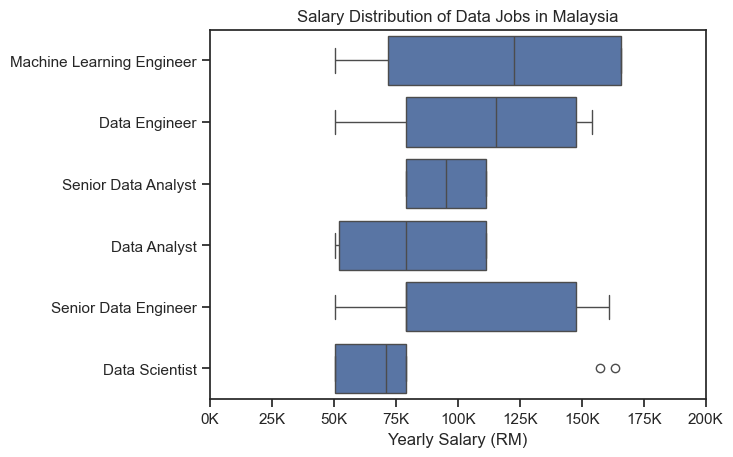

In [57]:
sns.boxplot(data=df_MY_top6, x='salary_year_avg', y='job_title_short', order=job_order)
plt.title('Salary Distribution of Data Jobs in Malaysia')
plt.xlabel('Yearly Salary (RM)')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))
plt.xlim(0, 200000)
plt.show()

2. Finding median salary per skills for Data Analysts

In [35]:
df_DA_MY = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Malaysia')].copy()

df_DA_MY = df_DA_MY.dropna(subset=['salary_year_avg'])

In [36]:
df_DA_MY = df_DA_MY.explode('job_skills')

df_DA_MY[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
7931,51014.0,python
7931,51014.0,r
7931,51014.0,sql
7931,51014.0,tableau
21523,111175.0,tableau


In [42]:
df_DA_top_pay = df_DA_MY.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

In [45]:
df_DA_skills = df_DA_MY.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
excel,5,111175.0
bigquery,1,111175.0
flow,2,87987.5
sql,5,79200.0
tableau,5,79200.0
looker,3,79200.0
php,1,79200.0
perl,1,79200.0
python,5,64800.0


3. Visualize for highest paying skills and most demanded skills

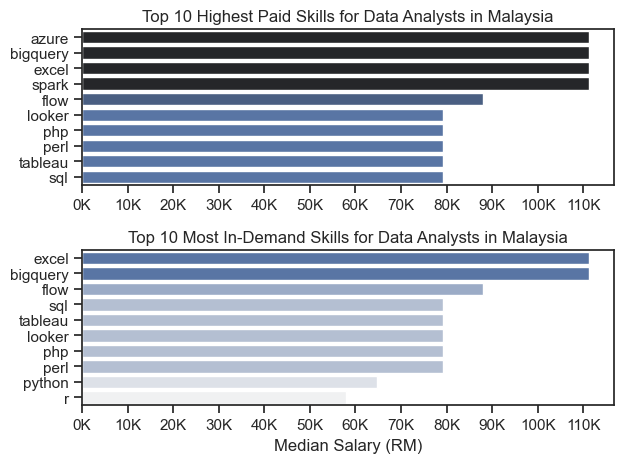

In [58]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style="ticks")

sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')
ax[0].legend().remove()

ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts in Malaysia')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].set_xticks(range(0, 110001, 10000))
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))

sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1], hue='median', palette='light:b')
ax[1].legend().remove()

ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts in Malaysia')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (RM)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_xticks(range(0, 110001, 10000))
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))

fig.tight_layout()